In [16]:
from plot_helpers import *
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats 
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from scipy.stats import linregress
import seaborn as sns
import matplotlib as mpl



# Set global font sizes - for manuscript
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize'] = 28
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['legend.fontsize'] = 18


In [17]:
# Load the statistics CSV file
combined_statistics_path = r"C:\Users\Feifei\Box\BR_remote_sensing\ebi_combined_statistics.csv"
df = pd.read_csv(combined_statistics_path)


One-way ANOVA Results:
F-statistic = 6.338, p-value = 1.119e-03

Kruskal-Wallis Test Results:
H-statistic = 10.222, p-value = 1.677e-02


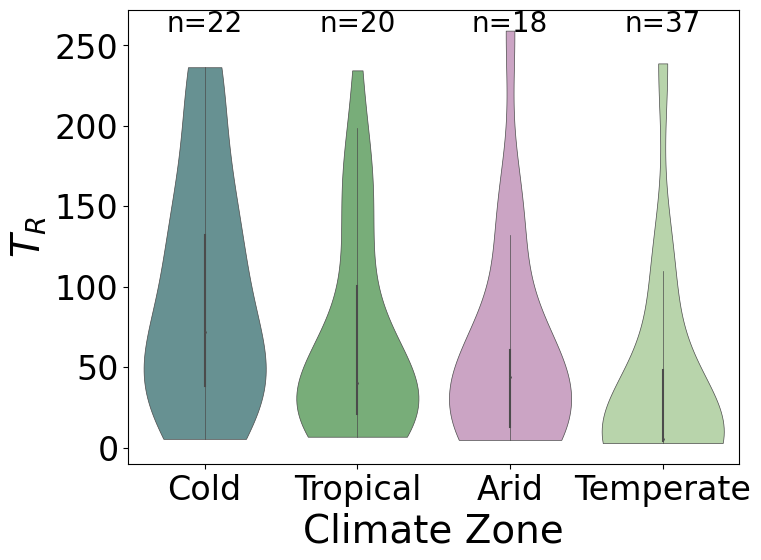

In [30]:

# Climate zone mapping
climate_full_names = {
    'A': 'Tropical',
    'B': 'Arid',
    'C': 'Temperate',
    'D': 'Cold',
    'E': 'Polar'
}

# Full name color mapping
climate_colors_full = {
    'Tropical': '#6fb671',  # Tropical (blue)
    'Arid': '#d19ec8',      # Arid (orange)
    'Temperate': '#b6dba4', # Temperate (green)
    'Cold': '#609899',      # Cold (red)
    'Polar': '#9467bd'      # Polar (purple)
}
# Extract the first letter from Climate Zone and map to full names
df['Climate Group'] = df['Climate Zone'].apply(lambda x: x[0] if isinstance(x, str) else None)
df['Climate Group Full Name'] = df['Climate Group'].map(climate_full_names)

# Calculate sample size for each Climate Group
sample_sizes = df.groupby('Climate Group Full Name').size()
f_stat, p_val = stats.f_oneway(*groups)
print("\nOne-way ANOVA Results:")
print(f"F-statistic = {f_stat:.3f}, p-value = {p_val:.3e}")

# Kruskal-Wallis test (non-parametric alternative to ANOVA)
h_stat, p_kruskal = stats.kruskal(*groups)
print("\nKruskal-Wallis Test Results:")
print(f"H-statistic = {h_stat:.3f}, p-value = {p_kruskal:.3e}")

# Create a figure for the violin plot
fig, ax = plt.subplots(figsize=(8, 6))

# Violin plot for all rivers
sns.violinplot(
    x='Climate Group Full Name', y='T_R',
    data=df, palette=climate_colors_full, ax=ax, cut=0, scale='width',  linewidth=0.5 # Set cut=0 to prevent extending beyond data range
)
#ax.set_ylim(top=9)

# Add sample sizes as a single line above the violins
for i, climate in enumerate(sample_sizes.index):
    ax.text(i, ax.get_ylim()[1] * 0.95, f'n={sample_sizes[climate]}', 
            ha='center', fontsize=20, color='black')

# Set plot titles and labels
ax.set_xlabel('Climate Zone')
ax.set_ylabel(r'${T_{R}}$')
ax.tick_params(axis='x')  # Rotate for clarity
ax.tick_params(axis='y')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\9_TR_violin.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)


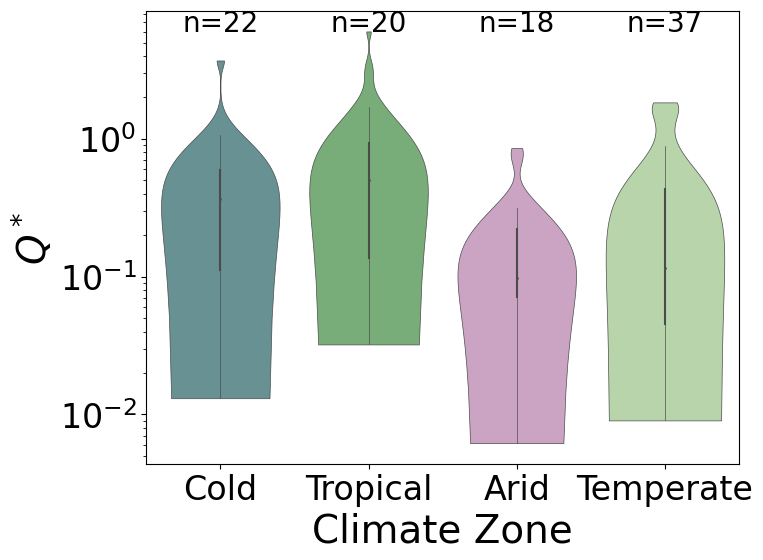

In [6]:

# Climate zone mapping
climate_full_names = {
    'A': 'Tropical',
    'B': 'Arid',
    'C': 'Temperate',
    'D': 'Cold',
    'E': 'Polar'
}

# Full name color mapping
climate_colors_full = {
    'Tropical': '#6fb671',  # Tropical (blue)
    'Arid': '#d19ec8',      # Arid (orange)
    'Temperate': '#b6dba4', # Temperate (green)
    'Cold': '#609899',      # Cold (red)
    'Polar': '#9467bd'      # Polar (purple)
}
# Extract the first letter from Climate Zone and map to full names
df['Climate Group'] = df['Climate Zone'].apply(lambda x: x[0] if isinstance(x, str) else None)
df['Climate Group Full Name'] = df['Climate Group'].map(climate_full_names)

# Calculate sample size for each Climate Group
sample_sizes = df.groupby('Climate Group Full Name').size()

# Create a figure for the violin plot
fig, ax = plt.subplots(figsize=(8, 6))

# Violin plot for all rivers
sns.violinplot(
    x='Climate Group Full Name', y='dim_Q',
    data=df, palette=climate_colors_full, ax=ax, cut=0, scale='width',  linewidth=0.5 # Set cut=0 to prevent extending beyond data range
)
#ax.set_ylim(top=9)

# Add sample sizes as a single line above the violins
for i, climate in enumerate(sample_sizes.index):
    ax.text(i, ax.get_ylim()[1] * 0.95, f'n={sample_sizes[climate]}', 
            ha='center', fontsize=20, color='black')

# Set plot titles and labels
ax.set_xlabel('Climate Zone')
ax.set_ylabel(r'$Q^*$')
ax.set_yscale('log')
ax.tick_params(axis='x')  # Rotate for clarity
ax.tick_params(axis='y')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\9_dimQ_violin.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)

Mean norm_migration_rate for each Climate Group:
Climate Group Full Name
Arid         0.061051
Cold         0.012017
Temperate    0.092248
Tropical     0.030782
Name: norm_migration_rate, dtype: float64

One-way ANOVA Results:
F-statistic = 6.338, p-value = 1.119e-03


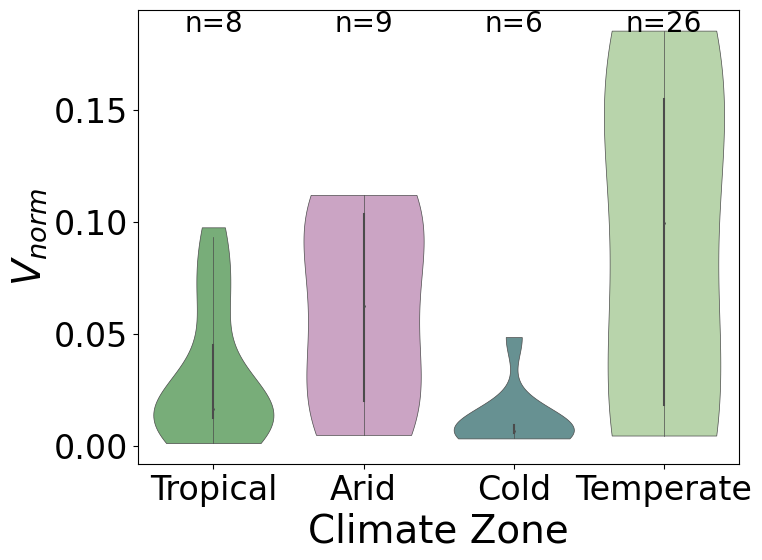

In [9]:
# Climate zone mapping
climate_full_names = {
    'A': 'Tropical',
    'B': 'Arid',
    'C': 'Temperate',
    'D': 'Cold',
    'E': 'Polar'
}

# Full name color mapping
climate_colors_full = {
    'Tropical': '#6fb671',  # Tropical (blue)
    'Arid': '#d19ec8',      # Arid (orange)
    'Temperate': '#b6dba4', # Temperate (green)
    'Cold': '#609899',      # Cold (red)
    'Polar': '#9467bd'      # Polar (purple)
}

# Extract the first letter from Climate Zone and map to full names
df['Climate Group'] = df['Climate Zone'].apply(lambda x: x[0] if isinstance(x, str) else None)
df['Climate Group Full Name'] = df['Climate Group'].map(climate_full_names)

# Calculate sample size for each Climate Group
sample_sizes = df.groupby('Climate Group Full Name').size()

# Calculate mean norm_migration_rate for each Climate Group
mean_norm = df.groupby('Climate Group Full Name')['norm_migration_rate'].mean()

# Print mean norm_migration_rate for each climate zone to the console
print("Mean norm_migration_rate for each Climate Group:")
print(mean_norm)

f_stat, p_val = stats.f_oneway(*groups)
print("\nOne-way ANOVA Results:")
print(f"F-statistic = {f_stat:.3f}, p-value = {p_val:.3e}")
# Create a figure for the violin plot
fig, ax = plt.subplots(figsize=(8, 6))

# Violin plot for all rivers
sns.violinplot(
    x='Climate Group Full Name', y='norm_migration_rate',
    data=df, palette=climate_colors_full, cut=0,
    scale='width', linewidth=0.5
)

#ax.set_ylim(top=9)

# Add sample sizes as a single line above the violins
for i, climate in enumerate(sample_sizes.index):
    ax.text(i, ax.get_ylim()[1] * 0.95, f'n={sample_sizes[climate]}', 
            ha='center', fontsize=20, color='black')



ax.set_xlabel('Climate Zone')
ax.set_ylabel(r'${V_{norm}}$')
ax.tick_params(axis='x')  # Rotate for clarity
ax.tick_params(axis='y')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\9_Vnorm_violin.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)


One-way ANOVA Results:
F-statistic = 6.338, p-value = 1.119e-03


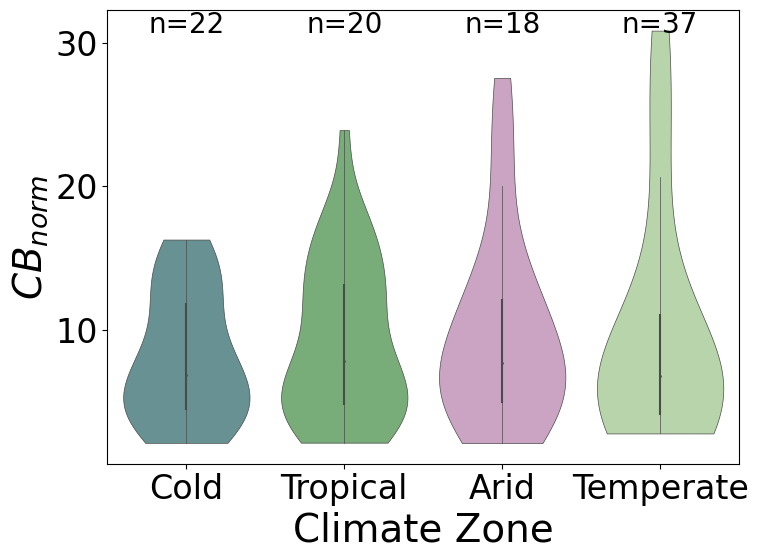

Mean norm_migration_rate for each Climate Group:
Climate Group Full Name
Arid         9.834146
Cold         8.041976
Temperate    9.643054
Tropical     9.247738
Name: CB/Aw, dtype: float64


In [23]:

# Climate zone mapping
climate_full_names = {
    'A': 'Tropical',
    'B': 'Arid',
    'C': 'Temperate',
    'D': 'Cold',
    'E': 'Polar'
}

# Full name color mapping
climate_colors_full = {
    'Tropical': '#6fb671',  # Tropical (blue)
    'Arid': '#d19ec8',      # Arid (orange)
    'Temperate': '#b6dba4', # Temperate (green)
    'Cold': '#609899',      # Cold (red)
    'Polar': '#9467bd'      # Polar (purple)
}

# Extract the first letter from Climate Zone and map to full names
df['Climate Group'] = df['Climate Zone'].apply(lambda x: x[0] if isinstance(x, str) else None)
df['Climate Group Full Name'] = df['Climate Group'].map(climate_full_names)

# Calculate sample size for each Climate Group
sample_sizes = df.groupby('Climate Group Full Name').size()

f_stat, p_val = stats.f_oneway(*groups)
print("\nOne-way ANOVA Results:")
print(f"F-statistic = {f_stat:.3f}, p-value = {p_val:.3e}")
# Create a figure for the violin plot
fig, ax = plt.subplots(figsize=(8, 6))

# Violin plot for all rivers
sns.violinplot(
    x='Climate Group Full Name', y='CB/Aw',
    data=df, palette=climate_colors_full, ax=ax, cut=0,scale='width', linewidth=0.5  # Set cut=0 to prevent extending beyond data range
)
#ax.set_ylim(top=9)

# Add sample sizes as a single line above the violins
for i, climate in enumerate(sample_sizes.index):
    ax.text(i, ax.get_ylim()[1] * 0.95, f'n={sample_sizes[climate]}', 
            ha='center', fontsize=20, color='black')



ax.set_xlabel('Climate Zone')
ax.set_ylabel(r'${CB_{norm}}$')
ax.tick_params(axis='x')  # Rotate for clarity
ax.tick_params(axis='y')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
mean_norm = df.groupby('Climate Group Full Name')['CB/Aw'].mean()

# Print mean norm_migration_rate for each climate zone to the console
print("Mean norm_migration_rate for each Climate Group:")
print(mean_norm)

fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\9_CB_violin.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)

In [32]:
# --- Existing code for ANOVA on norm_migration_rate stays as-is ---

# Kruskal-Wallis test for mean_ebi_site among Climate Groups
groups_ebi = [
    group['eBI_BI_ratio_site'].dropna().values
    for name, group in df.groupby('Climate Group Full Name') if len(group) > 0
]

h_stat_ebi, p_val_ebi = stats.kruskal(*groups_ebi)
print(f"H-statistic = {h_stat_ebi:.3f}, p-value = {p_val_ebi:.3e}")




H-statistic = 19.931, p-value = 1.754e-04


### Supplement

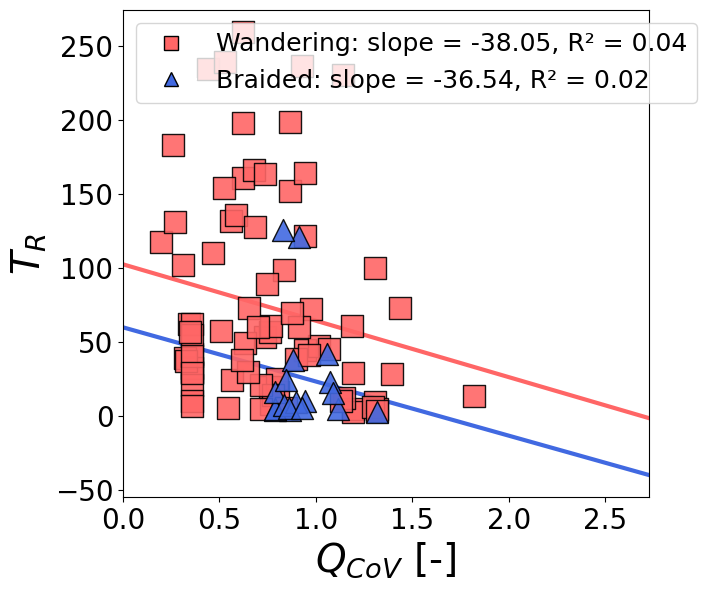

In [30]:
# Dynamically calculate x_range based on data (with padding)
x_range = (df['cov_discharge_site'].min() * 0, df['cov_discharge_site'].max() * 1.5)

# Define markers and colors
markers = {'Wandering': 's', 'B': '^'}  # Combined HSW and LSW symbols
colors = {'Wandering': '#FF6666', 'B': '#4169E1'}

# Combine wandering classifications into one group
wandering_types = ['HSW', 'LSW']
df['Group'] = df['Classification'].replace(wandering_types, 'Wandering')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 6))

# Dictionary to store slope and R² info for the legend
legend_info = {}

# Loop through each group to compute and plot the regression line.
for group in ['Wandering', 'B']:
    subset = df[df['Group'] == group]
    x_data = subset['cov_discharge_site']
    y_data = subset['T_R']
    
    # Ensure x_data are positive (needed for log transformation)
    if any(x_data <= 0):
        raise ValueError(f"Group {group} contains non-positive x values, cannot use log transformation.")
    
    # Fit regression using the unified function with mode "log-x"
    slope, intercept, predict = fit_regression(x_data, y_data, mode="linear")
    
    # Generate regression line values over the full x_range
    x_line = np.linspace(x_range[0], x_range[1], 300)
    y_line = predict(x_line)
    
    # Plot the regression line
    ax.plot(x_line, y_line, color=colors[group], lw=3)
    
    # Compute R² on the original data
    y_pred = predict(x_data)
    ss_res = ((y_data - y_pred) ** 2).sum()
    ss_tot = ((y_data - y_data.mean()) ** 2).sum()
    r2 = 1 - ss_res / ss_tot
    
    # Store slope and R² information for the legend
    legend_info[group] = f"slope = {slope:.2f}, R² = {r2:.2f}"

# Plot data points with error bars
for group in ['Wandering', 'B']:
    subset = df[df['Group'] == group]
    x_data = subset['cov_discharge_site']
    y_data = subset['T_R']
    #error_data = subset['ebi_error_annual']
    
    # Optionally, uncomment the errorbar line if desired:
    # ax.errorbar(x_data, y_data, yerr=error_data, fmt='none',
    #             ecolor='black', elinewidth=2, capsize=5, zorder=1)
    
    ax.scatter(x_data, y_data, label=group, marker=markers[group],
               c=colors[group], edgecolors='black', s=250, alpha=0.9, zorder=2)

# Set x-axis to log scale and adjust limits
# ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlim(*x_range)
#ax.set_ylim(bottom=-1)

# Set labels and tick parameters
ax.set_xlabel(r'${Q_{CoV}}$ [-]', fontsize=28)  # Display fraction as LaTeX
ax.set_ylabel(r'${T_{R}}$', fontsize=28)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Create a legend with slope and R² information
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker=markers['Wandering'], color='w',
           label=f"Wandering: {legend_info['Wandering']}",
           markerfacecolor=colors['Wandering'], markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker=markers['B'], color='w',
           label=f"Braided: {legend_info['B']}",
           markerfacecolor=colors['B'], markersize=10, markeredgecolor='black')
]
ax.legend(handles=legend_elements, fontsize=18, loc='upper left')

plt.tight_layout()
plt.show()

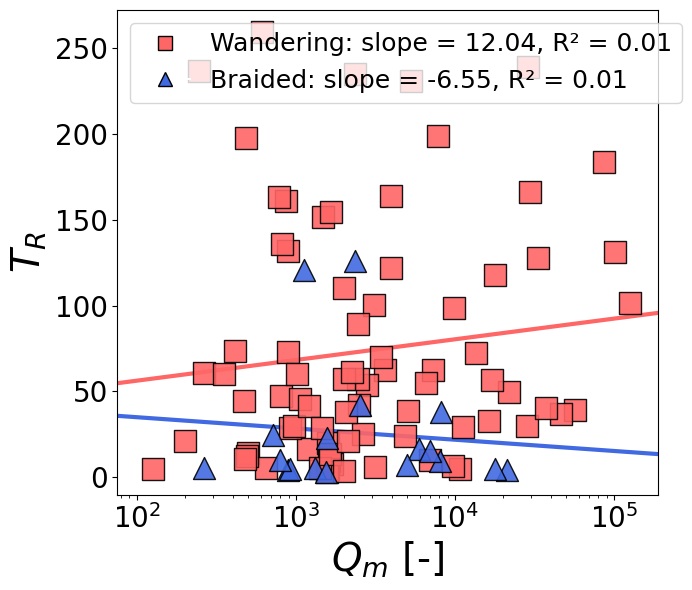

In [20]:
# Dynamically calculate x_range based on data (with padding)
x_range = (df['Qm'].min() * 0.6, df['Qm'].max() * 1.5)

# Define markers and colors
markers = {'Wandering': 's', 'B': '^'}  # Combined HSW and LSW symbols
colors = {'Wandering': '#FF6666', 'B': '#4169E1'}

# Combine wandering classifications into one group
wandering_types = ['HSW', 'LSW']
df['Group'] = df['Classification'].replace(wandering_types, 'Wandering')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 6))

# Dictionary to store slope and R² info for the legend
legend_info = {}

# Loop through each group to compute and plot the regression line.
for group in ['Wandering', 'B']:
    subset = df[df['Group'] == group]
    x_data = subset['Qm']
    y_data = subset['T_R']
    
    # Ensure x_data are positive (needed for log transformation)
    if any(x_data <= 0):
        raise ValueError(f"Group {group} contains non-positive x values, cannot use log transformation.")
    
    # Fit regression using the unified function with mode "log-x"
    slope, intercept, predict = fit_regression(x_data, y_data, mode="log-x")
    
    # Generate regression line values over the full x_range
    x_line = np.linspace(x_range[0], x_range[1], 300)
    y_line = predict(x_line)
    
    # Plot the regression line
    ax.plot(x_line, y_line, color=colors[group], lw=3)
    
    # Compute R² on the original data
    y_pred = predict(x_data)
    ss_res = ((y_data - y_pred) ** 2).sum()
    ss_tot = ((y_data - y_data.mean()) ** 2).sum()
    r2 = 1 - ss_res / ss_tot
    
    # Store slope and R² information for the legend
    legend_info[group] = f"slope = {slope:.2f}, R² = {r2:.2f}"

# Plot data points with error bars
for group in ['Wandering', 'B']:
    subset = df[df['Group'] == group]
    x_data = subset['Qm']
    y_data = subset['T_R']
    #error_data = subset['ebi_error_annual']
    
    # Optionally, uncomment the errorbar line if desired:
    # ax.errorbar(x_data, y_data, yerr=error_data, fmt='none',
    #             ecolor='black', elinewidth=2, capsize=5, zorder=1)
    
    ax.scatter(x_data, y_data, label=group, marker=markers[group],
               c=colors[group], edgecolors='black', s=250, alpha=0.9, zorder=2)

# Set x-axis to log scale and adjust limits
ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlim(*x_range)
#ax.set_ylim(bottom=0)

# Set labels and tick parameters
ax.set_xlabel(r'${Q_{m}}$ [-]', fontsize=28)  # Display fraction as LaTeX
ax.set_ylabel(r'${T_{R}}$', fontsize=28)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Create a legend with slope and R² information
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker=markers['Wandering'], color='w',
           label=f"Wandering: {legend_info['Wandering']}",
           markerfacecolor=colors['Wandering'], markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker=markers['B'], color='w',
           label=f"Braided: {legend_info['B']}",
           markerfacecolor=colors['B'], markersize=10, markeredgecolor='black')
]
ax.legend(handles=legend_elements, fontsize=18, loc='upper left')

plt.tight_layout()
plt.show()

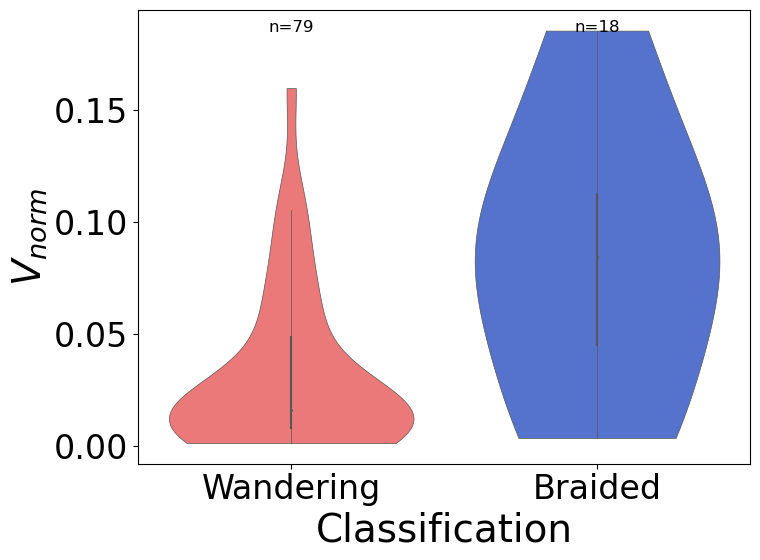

Two-sample t-test p-value: nan


In [ ]:
df['Classification Group'] = df['Classification'].replace({'HSW': 'Wandering',
                                                            'LSW': 'Wandering',
                                                            'B'  : 'Braided'})

# Filter only the two groups of interest if needed:
# df = df[df['Classification Group'].isin(['Braided', 'Wandering'])]

# Define the colors for the two classification groups
classification_colors = {
    'Wandering': '#FF6666',  # red-ish
    'Braided': '#4169E1'     # blue-ish
}

# Count the number of samples in each group
sample_sizes = df['Classification Group'].value_counts()

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Violin plot by Classification Group
sns.violinplot(
    x='Classification Group', 
    y='norm_migration_rate',
    data=df,
    palette=classification_colors, 
    ax=ax, 
    cut=0,        # prevents violin from extending beyond data range
    scale='width',
    linewidth=0.5
)

# Add sample sizes above each violin
# We'll position them near the top of the y-axis
top_val = ax.get_ylim()[1]
for i, group_name in enumerate(sample_sizes.index):
    ax.text(
        i, 
        top_val * 0.95, 
        f"n={sample_sizes[group_name]}", 
        ha='center', 
        fontsize=12, 
        color='black'
    )

# Set plot labels and appearance
ax.set_ylabel(r'${V_{norm}}$')
ax.set_xlabel(r'Classification')

ax.tick_params(axis='x')
ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\supp_Vnorm_violin.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)

In [25]:
# Subset the data for each group
braided = df[df['Classification Group'] == 'Braided']['mean_migration_rate']
wandering = df[df['Classification Group'] == 'Wandering']['mean_migration_rate']

# Perform a two-sample t-test (Welch’s t-test by default with equal_var=False)
t_stat, p_val = ttest_ind(braided, wandering, equal_var=False)

print(f"Two-sample t-test p-value: {p_val:.4f}")

Two-sample t-test p-value: nan


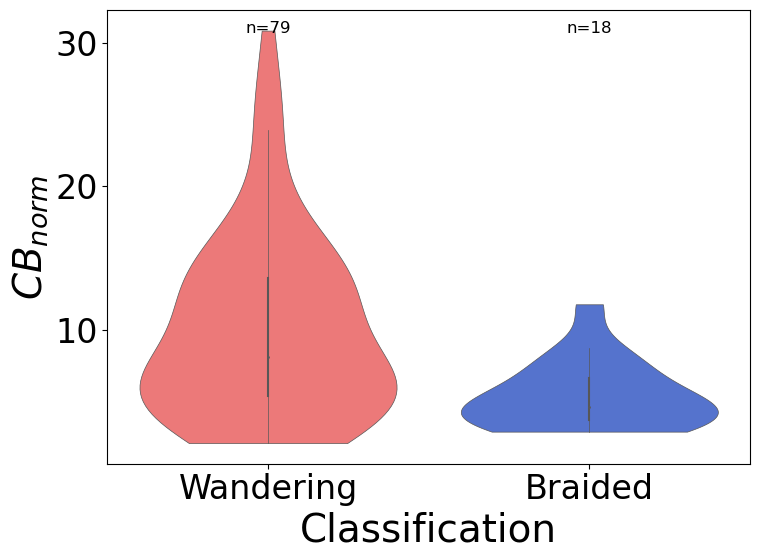

Two-sample t-test p-value: 0.0000


In [26]:
df['Classification Group'] = df['Classification'].replace({'HSW': 'Wandering',
                                                            'LSW': 'Wandering',
                                                            'B'  : 'Braided'})

# Filter only the two groups of interest if needed:
# df = df[df['Classification Group'].isin(['Braided', 'Wandering'])]

# Define the colors for the two classification groups
classification_colors = {
    'Wandering': '#FF6666',  # red-ish
    'Braided': '#4169E1'     # blue-ish
}

# Count the number of samples in each group
sample_sizes = df['Classification Group'].value_counts()

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Violin plot by Classification Group
sns.violinplot(
    x='Classification Group', 
    y='CB/Aw',
    data=df,
    palette=classification_colors, 
    ax=ax, 
    cut=0,        # prevents violin from extending beyond data range
    scale='width',
    linewidth=0.5
)

# Add sample sizes above each violin
# We'll position them near the top of the y-axis
top_val = ax.get_ylim()[1]
for i, group_name in enumerate(sample_sizes.index):
    ax.text(
        i, 
        top_val * 0.95, 
        f"n={sample_sizes[group_name]}", 
        ha='center', 
        fontsize=12, 
        color='black'
    )

# Set plot labels and appearance
ax.set_xlabel("Classification")
ax.set_ylabel(r'${CB_{norm}}$')
ax.tick_params(axis='x')
ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

# Subset the data for each group
braided = df[df['Classification Group'] == 'Braided']['CB/Aw']
wandering = df[df['Classification Group'] == 'Wandering']['CB/Aw']

# Perform a two-sample t-test (Welch’s t-test by default with equal_var=False)
t_stat, p_val = ttest_ind(braided, wandering, equal_var=False)

print(f"Two-sample t-test p-value: {p_val:.4f}")

fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\supp_CBnorm_violin_class.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)

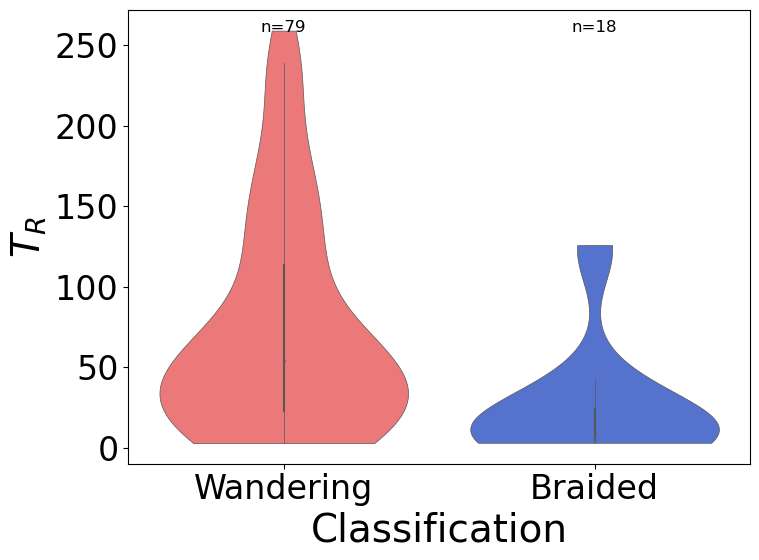

Two-sample t-test p-value: 0.0002


In [27]:
df['Classification Group'] = df['Classification'].replace({'HSW': 'Wandering',
                                                            'LSW': 'Wandering',
                                                            'B'  : 'Braided'})

# Filter only the two groups of interest if needed:
# df = df[df['Classification Group'].isin(['Braided', 'Wandering'])]

# Define the colors for the two classification groups
classification_colors = {
    'Wandering': '#FF6666',  # red-ish
    'Braided': '#4169E1'     # blue-ish
}

# Count the number of samples in each group
sample_sizes = df['Classification Group'].value_counts()

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Violin plot by Classification Group
sns.violinplot(
    x='Classification Group', 
    y='T_R',
    data=df,
    palette=classification_colors, 
    ax=ax, 
    cut=0,        # prevents violin from extending beyond data range
    scale='width',
    linewidth=0.5
)

# Add sample sizes above each violin
# We'll position them near the top of the y-axis
top_val = ax.get_ylim()[1]
for i, group_name in enumerate(sample_sizes.index):
    ax.text(
        i, 
        top_val * 0.95, 
        f"n={sample_sizes[group_name]}", 
        ha='center', 
        fontsize=12, 
        color='black'
    )

# Set plot labels and appearance
ax.set_xlabel("Classification")
ax.set_ylabel(r'${T_{R}}$')
ax.tick_params(axis='x')
ax.tick_params(axis='y')

plt.tight_layout()
plt.show()
# Subset the data for each group
braided = df[df['Classification Group'] == 'Braided']['T_R']
wandering = df[df['Classification Group'] == 'Wandering']['T_R']

# Perform a two-sample t-test (Welch’s t-test by default with equal_var=False)
t_stat, p_val = ttest_ind(braided, wandering, equal_var=False)

print(f"Two-sample t-test p-value: {p_val:.4f}")
fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\supp_TR_violin_class.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)